In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import os

In [2]:
os.chdir(r'C:\Users\Tina Bhadekar\OneDrive\Desktop\Study material\Data sets\udemy')

In [3]:
df = pd.read_csv("Bikehrs_data.csv")

In [4]:
import math

In [5]:
df_bikes= df.copy()

In [6]:
df_bikes = df_bikes.drop(['index','date','casual','registered'],axis =1)

In [7]:
df_bikes.head()

,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,demand
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [8]:
df_bikes.describe()

,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,demand
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,977.000000


In [9]:
df_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   year        17379 non-null  int64  
 2   month       17379 non-null  int64  
 3   hour        17379 non-null  int64  
 4   holiday     17379 non-null  int64  
 5   weekday     17379 non-null  int64  
 6   workingday  17379 non-null  int64  
 7   weather     17379 non-null  int64  
 8   temp        17379 non-null  float64
 9   atemp       17379 non-null  float64
 10  humidity    17379 non-null  float64
 11  windspeed   17379 non-null  float64
 12  demand      17379 non-null  int64  
dtypes: float64(4), int64(9)
memory usage: 1.7 MB


In [10]:
# another way to just find the presence of null values
df_bikes.isnull().sum()

season        0
year          0
month         0
hour          0
holiday       0
weekday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
demand        0
dtype: int64

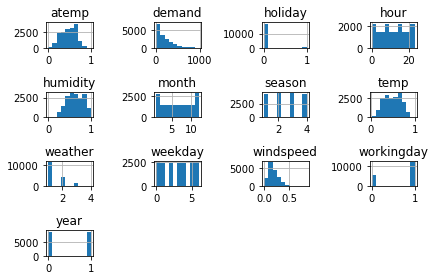

In [11]:
# create histogram- chart in array details - numerical values
df_bikes.hist()
# in form of  fig- each of variables and demand 
plt.tight_layout()

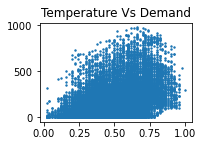

In [12]:
plt.subplot(2,2,1)
plt.title('Temperature Vs Demand')
plt.scatter(df_bikes['temp'],df_bikes['demand'],s = 2)

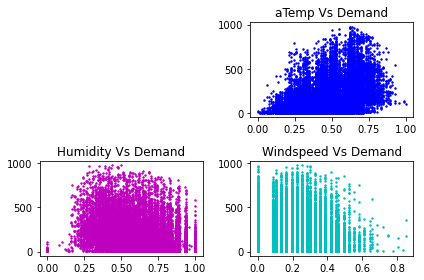

In [13]:
plt.subplot(2,2,2)
plt.title('aTemp Vs Demand')
plt.scatter(df_bikes['atemp'], df_bikes['demand'], s=2, c='b')

plt.subplot(2,2,3)
plt.title('Humidity Vs Demand')
plt.scatter(df_bikes['humidity'], df_bikes['demand'], s=2, c='m')

plt.subplot(2,2,4)
plt.title('Windspeed Vs Demand')
plt.scatter(df_bikes['windspeed'], df_bikes['demand'], s=2, c='c')

plt.tight_layout()



In [14]:
# average demand per season 
cat_list = df_bikes['season'].unique()
print(cat_list)

[1 2 3 4]


In [15]:
cat_average = df_bikes.groupby('season').mean()['demand']
print(cat_average)

season
1    111.114569
2    208.344069
3    236.016237
4    198.868856
Name: demand, dtype: float64


<BarContainer object of 4 artists>

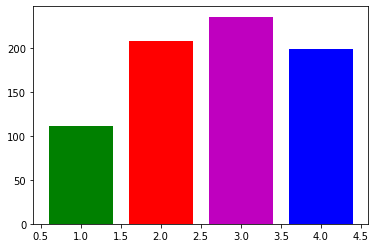

In [16]:
colors = ['g', 'r', 'm', 'b']
plt.bar(cat_list,cat_average,color=colors)

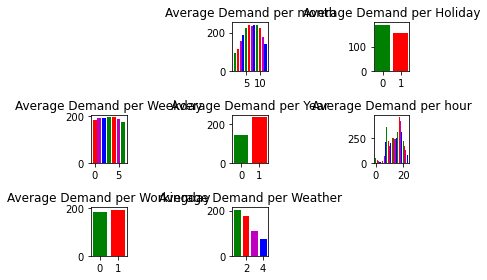

In [17]:
# compare with other 8 categories
plt.subplot(3,3,2)
plt.title('Average Demand per month')
cat_list = df_bikes['month'].unique()
cat_average = df_bikes.groupby('month').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

plt.subplot(3,3,3)
plt.title('Average Demand per Holiday')
cat_list = df_bikes['holiday'].unique()
cat_average = df_bikes.groupby('holiday').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

plt.subplot(3,3,4)
plt.title('Average Demand per Weekday')
cat_list = df_bikes['weekday'].unique()
cat_average = df_bikes.groupby('weekday').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

plt.subplot(3,3,5)
plt.title('Average Demand per Year')
cat_list = df_bikes['year'].unique()
cat_average = df_bikes.groupby('year').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

plt.subplot(3,3,6)
plt.title('Average Demand per hour')
cat_list = df_bikes['hour'].unique()
cat_average = df_bikes.groupby('hour').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

plt.subplot(3,3,7)
plt.title('Average Demand per Workingday')
cat_list = df_bikes['workingday'].unique()
cat_average = df_bikes.groupby('workingday').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

plt.subplot(3,3,8)
plt.title('Average Demand per Weather')
cat_list = df_bikes['weather'].unique()
cat_average = df_bikes.groupby('weather').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

plt.tight_layout()


<BarContainer object of 24 artists>

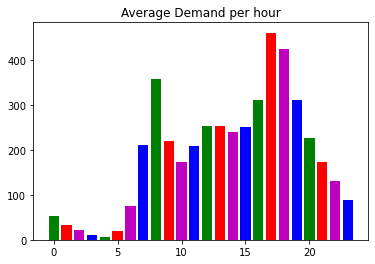

In [18]:
plt.title('Average Demand per hour')
cat_list = df_bikes['hour'].unique()
cat_average = df_bikes.groupby('hour').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)


In [ ]:
# check for outliers

In [19]:
df_bikes['demand'].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: demand, dtype: float64

In [ ]:
# demand for hrs

In [21]:
df_bikes['demand'].quantile([.05,0.1,0.15,0.9,0.95,0.99])

0.05      5.00
0.10      9.00
0.15     16.00
0.90    451.20
0.95    563.10
0.99    782.22
Name: demand, dtype: float64

In [ ]:
# Correlation

In [25]:
corr = df_bikes[['temp','atemp','humidity','windspeed','demand']].corr()
print(corr)

               temp     atemp  humidity  windspeed    demand
temp       1.000000  0.987672 -0.069881  -0.023125  0.404772
atemp      0.987672  1.000000 -0.051918  -0.062336  0.400929
humidity  -0.069881 -0.051918  1.000000  -0.290105 -0.322911
windspeed -0.023125 -0.062336 -0.290105   1.000000  0.093234
demand     0.404772  0.400929 -0.322911   0.093234  1.000000


In [29]:
import seaborn as sns
sns.set()

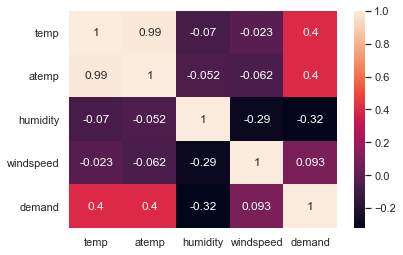

In [31]:
sns.heatmap(data=corr,annot=True)

In [ ]:
df_bikes = df_bikes.drop(['weekday', 'year', 'workingday', 'atemp', 'windspeed'], axis=1)


In [37]:
df_bikes.head()

,season,month,hour,holiday,weather,temp,humidity,demand
0,1,1,0,0,1,0.24,0.81,16
1,1,1,1,0,1,0.22,0.80,40
2,1,1,2,0,1,0.22,0.80,32
3,1,1,3,0,1,0.24,0.75,13
4,1,1,4,0,1,0.24,0.75,1


(array([-12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,
          1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12]),
 array([0.45474696, 0.47049534, 0.4962279 , 0.4940404 , 0.46795923,
        0.47732025, 0.5267575 , 0.59145725, 0.65201557, 0.71519524,
        0.80591   , 0.9253094 , 1.        , 0.9253094 , 0.80591   ,
        0.71519524, 0.65201557, 0.59145725, 0.5267575 , 0.47732025,
        0.46795923, 0.4940404 , 0.4962279 , 0.47049534, 0.45474696],
       dtype=float32),
 <matplotlib.lines.Line2D at 0x2177a0fd340>)

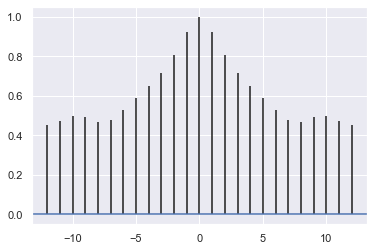

In [38]:
dff1 = pd.to_numeric(df_bikes['demand'], downcast='float')
plt.acorr(dff1, maxlags=12)



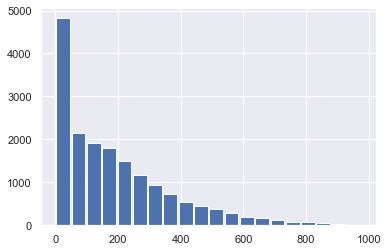

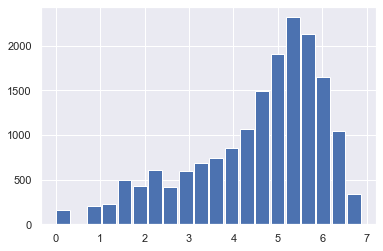

In [39]:
df1 =df_bikes['demand']
df2=np.log(df1)
plt.figure()
df1.hist(rwidth=.9,bins =20)
plt.figure()
df2.hist(rwidth=.9,bins =20)

In [40]:
df_bikes['demand']=np.log(df_bikes['demand'])

In [41]:
print(df_bikes)

       season  month  hour  holiday  weather  temp  humidity    demand
0           1      1     0        0        1  0.24      0.81  2.772589
1           1      1     1        0        1  0.22      0.80  3.688879
2           1      1     2        0        1  0.22      0.80  3.465736
3           1      1     3        0        1  0.24      0.75  2.564949
4           1      1     4        0        1  0.24      0.75  0.000000
...       ...    ...   ...      ...      ...   ...       ...       ...
17374       1     12    19        0        2  0.26      0.60  4.779123
17375       1     12    20        0        2  0.26      0.60  4.488636
17376       1     12    21        0        1  0.26      0.60  4.499810
17377       1     12    22        0        1  0.26      0.56  4.110874
17378       1     12    23        0        1  0.26      0.65  3.891820

[17379 rows x 8 columns]


In [ ]:
# Auto corr in demand column

In [42]:
t_1 = df_bikes['demand'].shift(+1).to_frame()
t_1.columns =['t-1']

In [43]:
t_2 = df_bikes['demand'].shift(+2).to_frame()
t_2.columns = ['t-2']

t_3 = df_bikes['demand'].shift(+3).to_frame()
t_3.columns = ['t-3']


In [44]:
bikes_prep_lag = pd.concat([df_bikes, t_1, t_2, t_3], axis=1)

In [45]:
print(bikes_prep_lag)

       season  month  hour  holiday  weather  temp  humidity    demand  \
0           1      1     0        0        1  0.24      0.81  2.772589   
1           1      1     1        0        1  0.22      0.80  3.688879   
2           1      1     2        0        1  0.22      0.80  3.465736   
3           1      1     3        0        1  0.24      0.75  2.564949   
4           1      1     4        0        1  0.24      0.75  0.000000   
...       ...    ...   ...      ...      ...   ...       ...       ...   
17374       1     12    19        0        2  0.26      0.60  4.779123   
17375       1     12    20        0        2  0.26      0.60  4.488636   
17376       1     12    21        0        1  0.26      0.60  4.499810   
17377       1     12    22        0        1  0.26      0.56  4.110874   
17378       1     12    23        0        1  0.26      0.65  3.891820   

            t-1       t-2       t-3  
0           NaN       NaN       NaN  
1      2.772589       NaN       NaN

In [46]:
bikes_prep_lag = bikes_prep_lag.dropna()

In [47]:
print(bikes_prep_lag)

       season  month  hour  holiday  weather  temp  humidity    demand  \
3           1      1     3        0        1  0.24      0.75  2.564949   
4           1      1     4        0        1  0.24      0.75  0.000000   
5           1      1     5        0        2  0.24      0.75  0.000000   
6           1      1     6        0        1  0.22      0.80  0.693147   
7           1      1     7        0        1  0.20      0.86  1.098612   
...       ...    ...   ...      ...      ...   ...       ...       ...   
17374       1     12    19        0        2  0.26      0.60  4.779123   
17375       1     12    20        0        2  0.26      0.60  4.488636   
17376       1     12    21        0        1  0.26      0.60  4.499810   
17377       1     12    22        0        1  0.26      0.56  4.110874   
17378       1     12    23        0        1  0.26      0.65  3.891820   

            t-1       t-2       t-3  
3      3.465736  3.688879  2.772589  
4      2.564949  3.465736  3.688879

In [48]:
bikes_prep_lag.dtypes

season        int64
month         int64
hour          int64
holiday       int64
weather       int64
temp        float64
humidity    float64
demand      float64
t-1         float64
t-2         float64
t-3         float64
dtype: object

In [49]:
bikes_prep_lag['season'] = bikes_prep_lag['season'].astype('category')
bikes_prep_lag['holiday'] = bikes_prep_lag['holiday'].astype('category')
bikes_prep_lag['weather'] = bikes_prep_lag['weather'].astype('category')
bikes_prep_lag['month'] = bikes_prep_lag['month'].astype('category')
bikes_prep_lag['hour'] = bikes_prep_lag['hour'].astype('category')

bikes_prep_lag = pd.get_dummies(bikes_prep_lag, drop_first=True)


In [50]:
print(bikes_prep_lag)

       temp  humidity    demand       t-1       t-2       t-3  season_2  \
3      0.24      0.75  2.564949  3.465736  3.688879  2.772589         0   
4      0.24      0.75  0.000000  2.564949  3.465736  3.688879         0   
5      0.24      0.75  0.000000  0.000000  2.564949  3.465736         0   
6      0.22      0.80  0.693147  0.000000  0.000000  2.564949         0   
7      0.20      0.86  1.098612  0.693147  0.000000  0.000000         0   
...     ...       ...       ...       ...       ...       ...       ...   
17374  0.26      0.60  4.779123  4.804021  5.099866  5.365976         0   
17375  0.26      0.60  4.488636  4.779123  4.804021  5.099866         0   
17376  0.26      0.60  4.499810  4.488636  4.779123  4.804021         0   
17377  0.26      0.56  4.110874  4.499810  4.488636  4.779123         0   
17378  0.26      0.65  3.891820  4.110874  4.499810  4.488636         0   

       season_3  season_4  month_2  ...  hour_18  hour_19  hour_20  hour_21  \
3             0     

In [ ]:
# Create Train and test split

In [52]:
Y = bikes_prep_lag['demand']
X = bikes_prep_lag.drop(['demand'],axis =1)

In [53]:
tr_size =0.7*len(X)
tr_size = int(tr_size)

In [54]:
X_train = X.values[0 : tr_size]
X_test = X.values[tr_size : len(X)]

Y_train = Y.values[0 : tr_size]
Y_test = Y.values[tr_size : len(Y)]


In [55]:
from sklearn.linear_model import LinearRegression

std_reg = LinearRegression()
std_reg.fit(X_train, Y_train)

r2_train = std_reg.score(X_train, Y_train)
r2_test  = std_reg.score(X_test, Y_test)


In [56]:
Y_predict = std_reg.predict(X_test)

In [57]:
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(Y_test, Y_predict))
print(rmse)

0.3809880049817041


In [ ]:
# Calculate RMSLE and compare results-log prediction and log actual +1 is used so there is o negative values
# Exponent opposite to log

In [58]:
Y_test_e = []
Y_predict_e = []

for i in range(0, len(Y_test)):
    Y_test_e.append(math.exp(Y_test[i]))
    Y_predict_e.append(math.exp(Y_predict[i]))

log_sq_sum = 0.0

for i in range(0, len(Y_test_e)):
    log_a = math.log(Y_test_e[i] + 1)
    log_p = math.log(Y_predict_e[i] + 1)
    log_diff = (log_p - log_a)**2
    log_sq_sum = log_sq_sum + log_diff

rmsle = math.sqrt(log_sq_sum/len(Y_test))

print(rmsle)


0.35609417069802074
